##EXERCISE 1

In [ ]:
pip install faker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.6 MB/s eta 0:00:00


In [ ]:
from faker import Faker
import pandas as pd

fake = Faker()

# Generate synthetic data for one numeric and one categorical attribute
data = {'Numeric': [fake.random_number(digits=5) for _ in range(100)],
        'Category': [fake.random_element(elements=('A', 'B', 'C')) for _ in range(100)]}

df = pd.DataFrame(data)
print(df.head())


   Numeric Category
0    62799        C
1    29020        C
2    12208        A
3    90571        B
4    90253        C


In [ ]:
pip install mimesis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 17.2 MB/s eta 0:00:00


In [ ]:
from mimesis import Generic
import pandas as pd

generic = Generic()

# Generate synthetic data for one numeric and one categorical attribute
data = {'Numeric': [generic.random.randint(1, 1000) for _ in range(100)],
        'Category': [generic.choice(['A', 'B', 'C']) for _ in range(100)]}

df = pd.DataFrame(data)
print(df.head())


   Numeric Category
0      403        A
1      795        A
2      808        B
3      542        C
4      860        B


In [ ]:
from sklearn.datasets import make_classification
import pandas as pd

# Generate synthetic data for one numeric and one categorical attribute
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

data = {'Numeric': X.flatten(),
        'Category': ['A' if label == 0 else 'B' for label in y]}

df = pd.DataFrame(data)
print(df.head())


    Numeric Category
0 -1.121978        A
1 -0.708785        A
2  0.426987        B
3 -0.755781        A
4 -1.106984        A


##EXERCISE 2

Generate dataset

In [2]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Number of records
num_records = 1000

# Generate synthetic data
data = {
    'UserID': np.arange(1001, 1001 + num_records),
    'Age': np.random.randint(18, 66, size=num_records),
    'Location': np.random.choice(['New York', 'Los Angeles', 'London', 'Tokyo', 'Sydney'], size=num_records),
    'DeviceType': np.random.choice(['Android', 'iOS', 'Windows', 'macOS'], size=num_records),
    'SearchHistoryFrequency': np.random.randint(0, 101, size=num_records),
    'CallLogsPermission': np.random.choice([0, 1], size=num_records),
    'LocationTrackingPermission': np.random.choice([0, 1], size=num_records),
    'BehavioralTrackingScore': np.random.uniform(0.0, 1.0, size=num_records),
    'AdsInteractionFrequency': np.random.randint(0, 51, size=num_records),
    'PrivacyComfortLevel': np.random.choice([0, 1], size=num_records)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the generated dataset
print(df.head())


   UserID  Age  Location DeviceType  SearchHistoryFrequency  \
0    1001   56  New York    Windows                      36   
1    1002   46     Tokyo    Android                      83   
2    1003   32  New York      macOS                      48   
3    1004   60     Tokyo        iOS                      20   
4    1005   25  New York        iOS                      73   

   CallLogsPermission  LocationTrackingPermission  BehavioralTrackingScore  \
0                   0                           1                 0.143001   
1                   1                           1                 0.374548   
2                   0                           1                 0.797732   
3                   1                           0                 0.367391   
4                   0                           1                 0.087017   

   AdsInteractionFrequency  PrivacyComfortLevel  
0                       24                    1  
1                       15                    1  
2 

In [3]:

# Introduce outliers in 'SearchHistoryFrequency'
df.loc[df.sample(frac=0.05, random_state=42).index, 'SearchHistoryFrequency'] = 150


In [4]:
# Display the first few rows of the generated dataset with outliers
print("Dataset with Outliers:")
print(df.head())

Dataset with Outliers:
   UserID  Age  Location DeviceType  SearchHistoryFrequency  \
0    1001   56  New York    Windows                      36   
1    1002   46     Tokyo    Android                      83   
2    1003   32  New York      macOS                      48   
3    1004   60     Tokyo        iOS                      20   
4    1005   25  New York        iOS                      73   

   CallLogsPermission  LocationTrackingPermission  BehavioralTrackingScore  \
0                   0                           1                 0.143001   
1                   1                           1                 0.374548   
2                   0                           1                 0.797732   
3                   1                           0                 0.367391   
4                   0                           1                 0.087017   

   AdsInteractionFrequency  PrivacyComfortLevel  
0                       24                    1  
1                       15   

In [5]:
# Save the dataset with outliers to a CSV file
df.to_csv('SocialMediaTrackingDataset_with_outliers.csv', index=False)

In [6]:
# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

In [7]:
# Remove outliers in 'SearchHistoryFrequency'
df_cleaned = remove_outliers(df, 'SearchHistoryFrequency')

# Display the first few rows of the cleaned dataset
print("\nDataset after Removing Outliers:")
print(df_cleaned.head())

# Save the cleaned dataset to a CSV file
df_cleaned.to_csv('SocialMediaTrackingDataset_cleaned.csv', index=False)


Dataset after Removing Outliers:
   UserID  Age  Location DeviceType  SearchHistoryFrequency  \
0    1001   56  New York    Windows                      36   
1    1002   46     Tokyo    Android                      83   
2    1003   32  New York      macOS                      48   
3    1004   60     Tokyo        iOS                      20   
4    1005   25  New York        iOS                      73   

   CallLogsPermission  LocationTrackingPermission  BehavioralTrackingScore  \
0                   0                           1                 0.143001   
1                   1                           1                 0.374548   
2                   0                           1                 0.797732   
3                   1                           0                 0.367391   
4                   0                           1                 0.087017   

   AdsInteractionFrequency  PrivacyComfortLevel  
0                       24                    1  
1                 

#b)

1. Breadth of Exploration:
Question 1: What is the distribution of age among users?
Question 2: How does the location distribution look?
Question 3: What's the relationship between PrivacyComfortLevel and BehavioralTrackingScore?
Question 4: Are there differences in SearchHistoryFrequency between different device types?

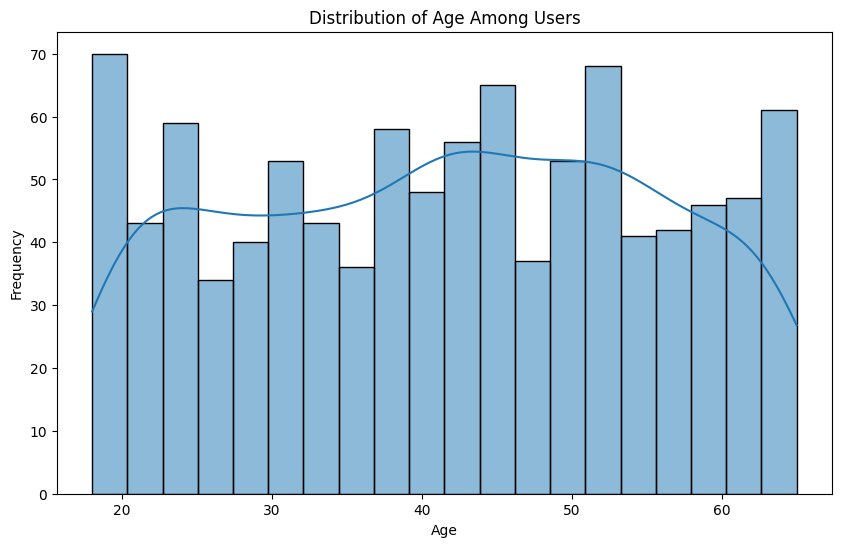

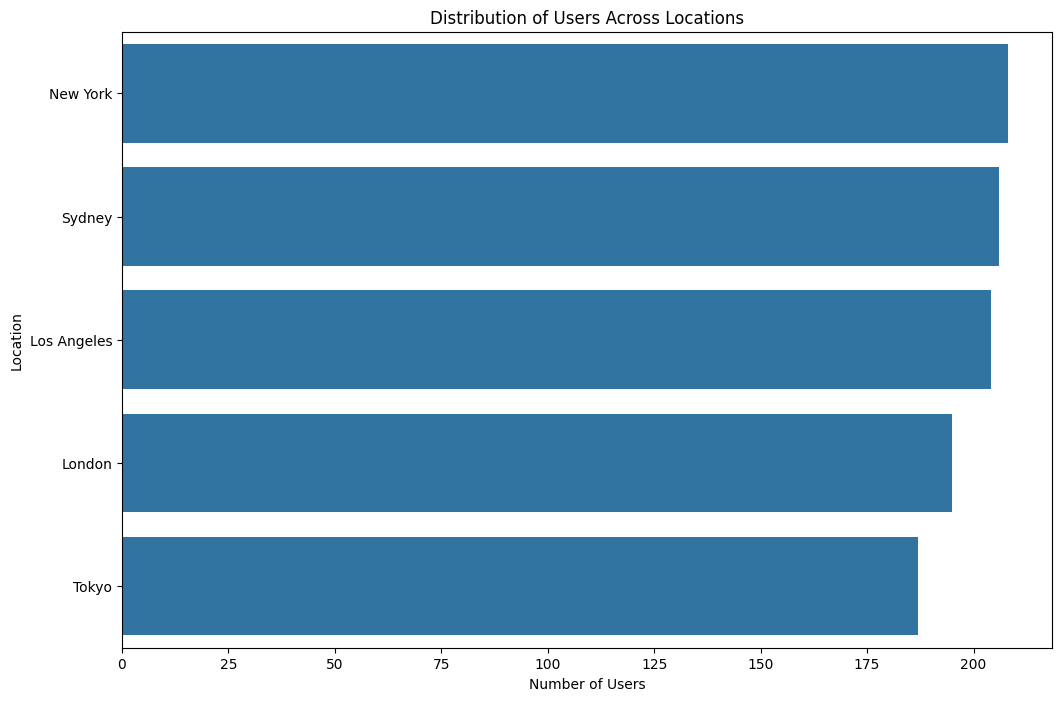

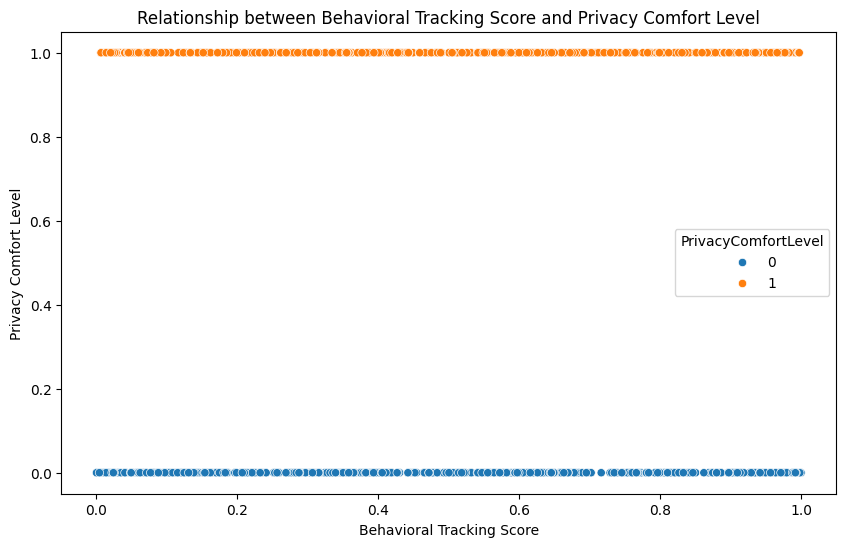

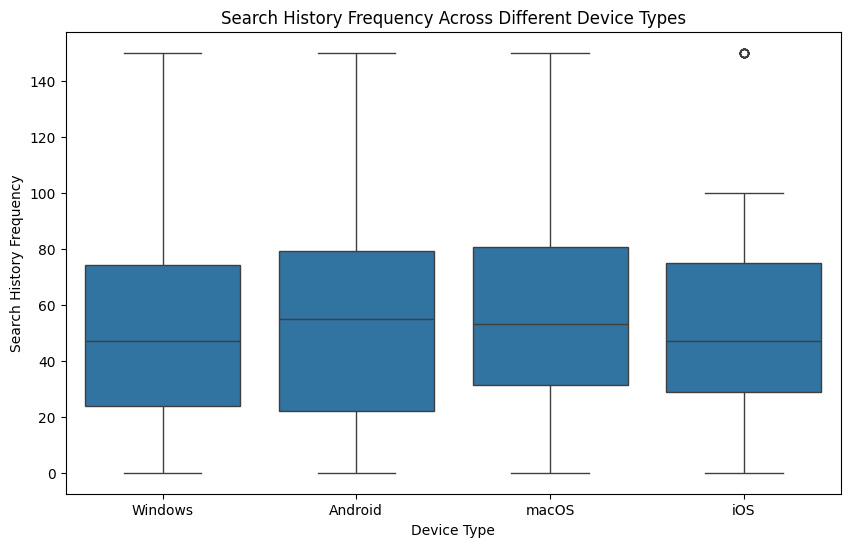

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age Among Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualization
plt.figure(figsize=(12, 8))
sns.countplot(y='Location', data=df, order=df['Location'].value_counts().index)
plt.title('Distribution of Users Across Locations')
plt.xlabel('Number of Users')
plt.ylabel('Location')
plt.show()

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BehavioralTrackingScore', y='PrivacyComfortLevel', data=df, hue='PrivacyComfortLevel')
plt.title('Relationship between Behavioral Tracking Score and Privacy Comfort Level')
plt.xlabel('Behavioral Tracking Score')
plt.ylabel('Privacy Comfort Level')
plt.show()

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='DeviceType', y='SearchHistoryFrequency', data=df)
plt.title('Search History Frequency Across Different Device Types')
plt.xlabel('Device Type')
plt.ylabel('Search History Frequency')
plt.show()


2. Depth of Exploration:
Follow-up Question 1: What is the median age in each location?
Follow-up Question 2: How many users have both call logs and location tracking permissions?
Follow-up Question 3: What is the average AdsInteractionFrequency for users comfortable with privacy and those uncomfortable?


In [9]:
# Code
median_age_by_location = df.groupby('Location')['Age'].median().sort_values(ascending=False)
print(median_age_by_location)

# Code
users_with_permissions = df[(df['CallLogsPermission'] == 1) & (df['LocationTrackingPermission'] == 1)]
num_users_with_permissions = len(users_with_permissions)
print(f"Number of users with both permissions: {num_users_with_permissions}")

# Code
average_ads_interaction_by_privacy = df.groupby('PrivacyComfortLevel')['AdsInteractionFrequency'].mean()
print(average_ads_interaction_by_privacy)



Location
Sydney         43.0
Tokyo          43.0
London         42.0
Los Angeles    42.0
New York       40.5
Name: Age, dtype: float64
Number of users with both permissions: 240
PrivacyComfortLevel
0    24.564961
1    24.721545
Name: AdsInteractionFrequency, dtype: float64


3. Data Quality:

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicate records
duplicate_records = df[df.duplicated()]
print("Duplicate Records:\n", duplicate_records)



Missing Values:
 UserID                        0
Age                           0
Location                      0
DeviceType                    0
SearchHistoryFrequency        0
CallLogsPermission            0
LocationTrackingPermission    0
BehavioralTrackingScore       0
AdsInteractionFrequency       0
PrivacyComfortLevel           0
dtype: int64
Duplicate Records:
 Empty DataFrame
Columns: [UserID, Age, Location, DeviceType, SearchHistoryFrequency, CallLogsPermission, LocationTrackingPermission, BehavioralTrackingScore, AdsInteractionFrequency, PrivacyComfortLevel]
Index: []


4. Visualizations

<ipython-input-11-0a8de1e4c0ef>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


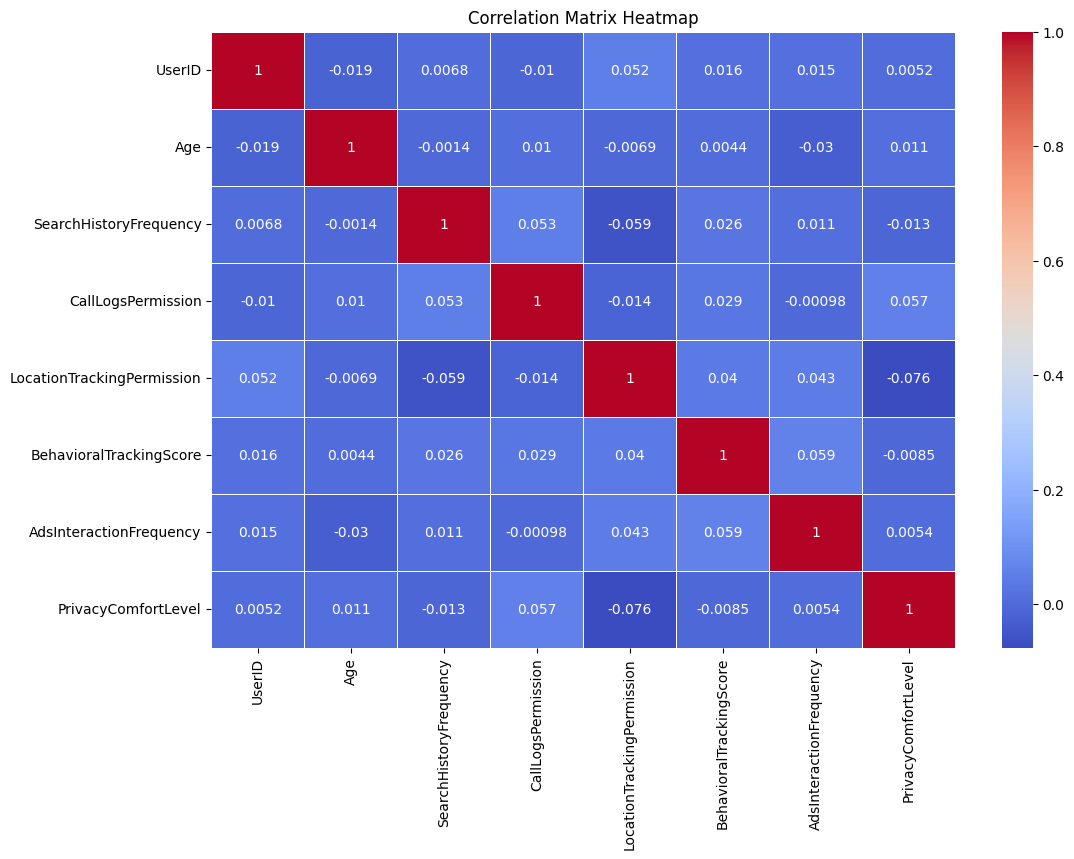

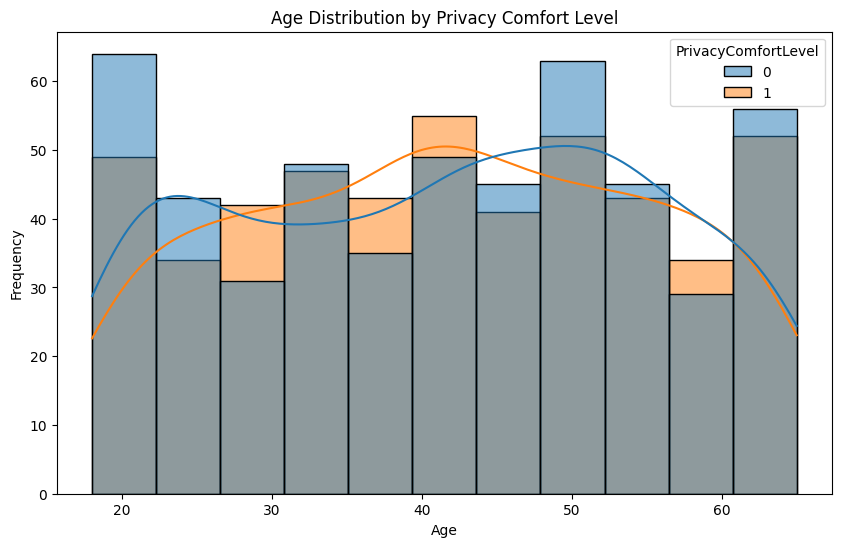

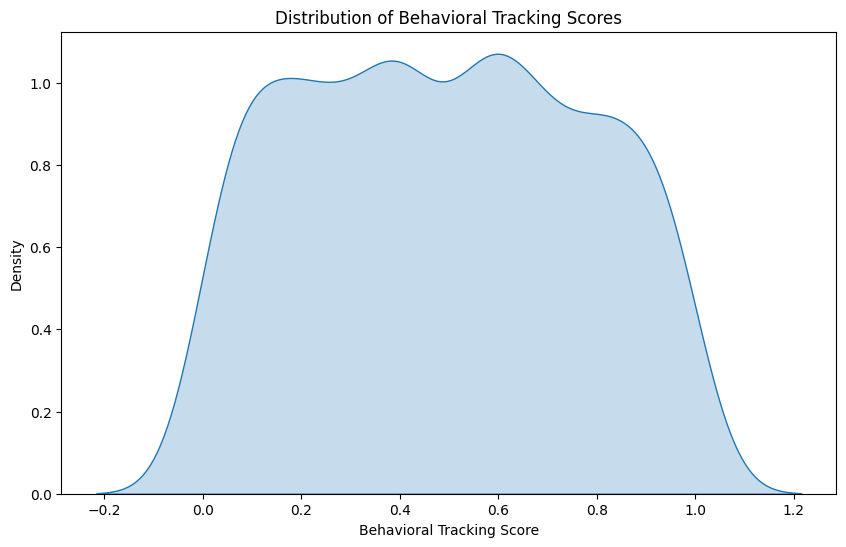

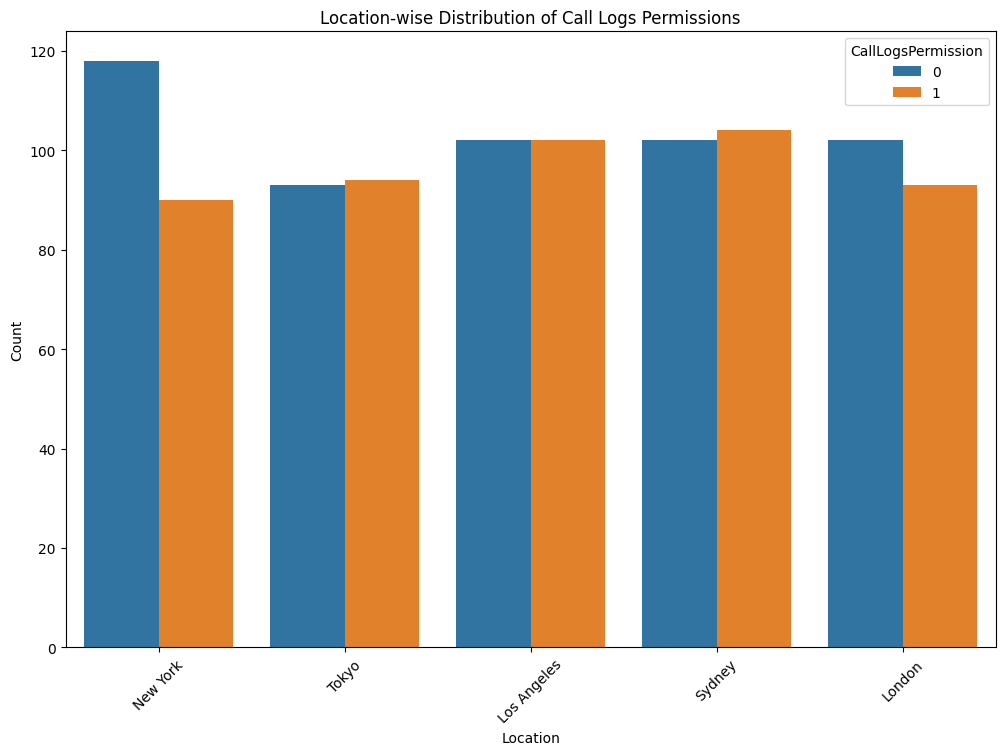

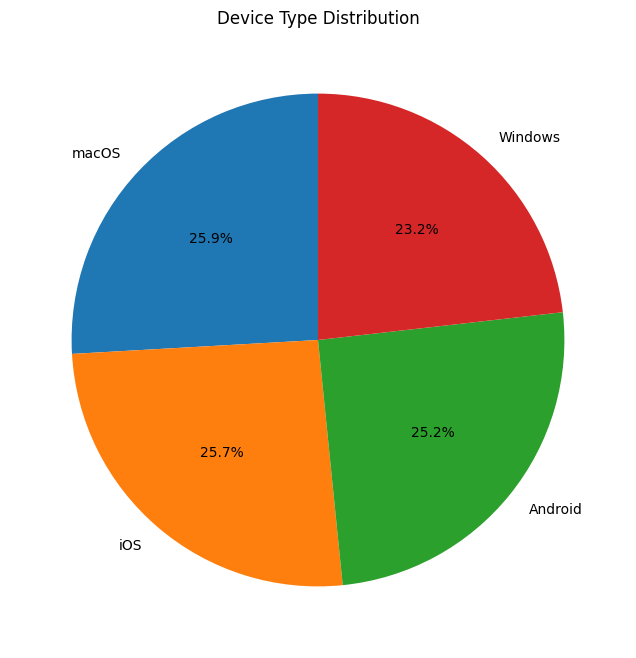

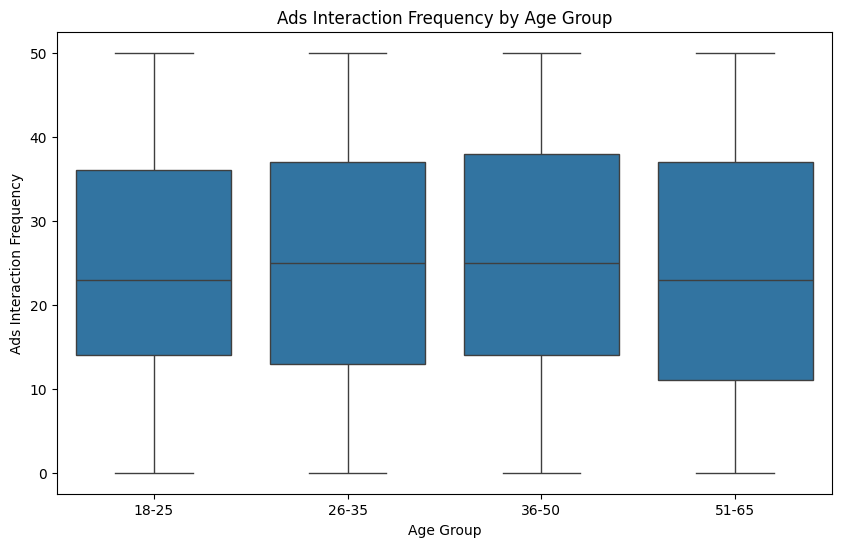

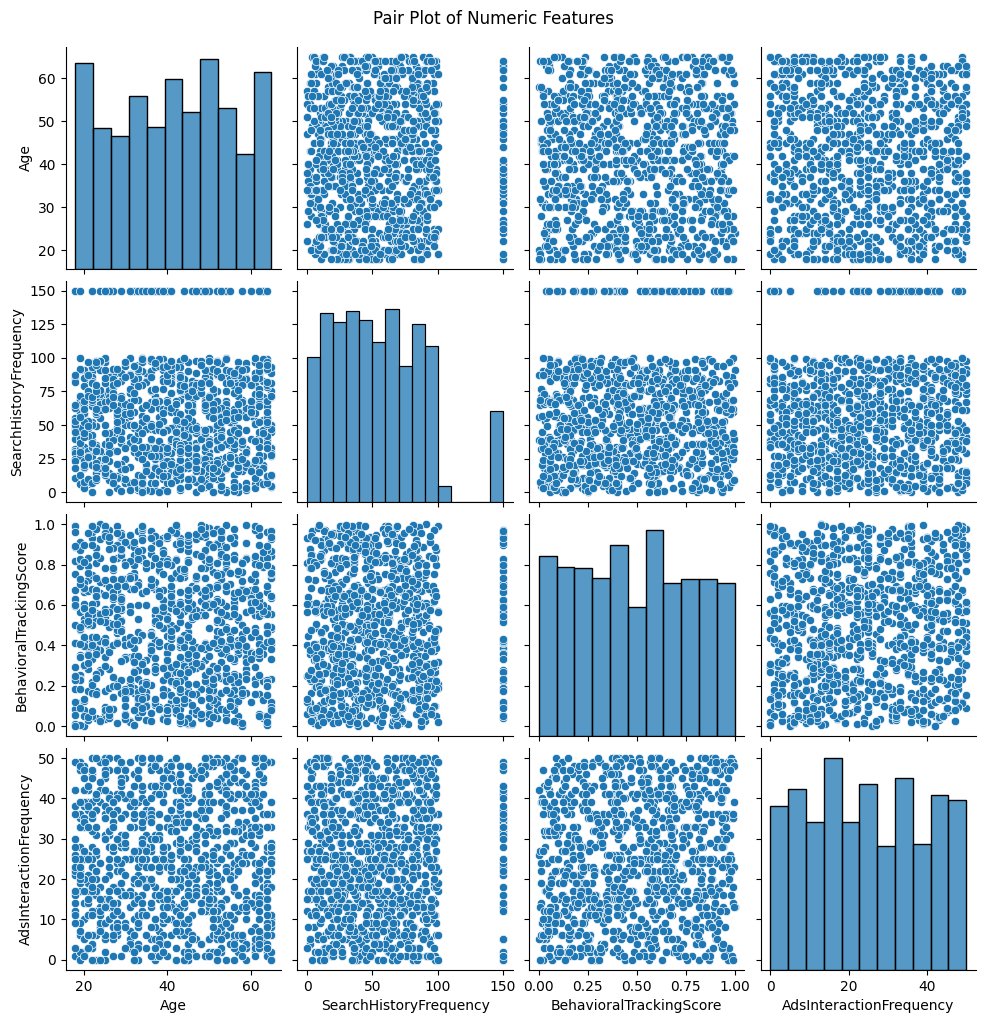

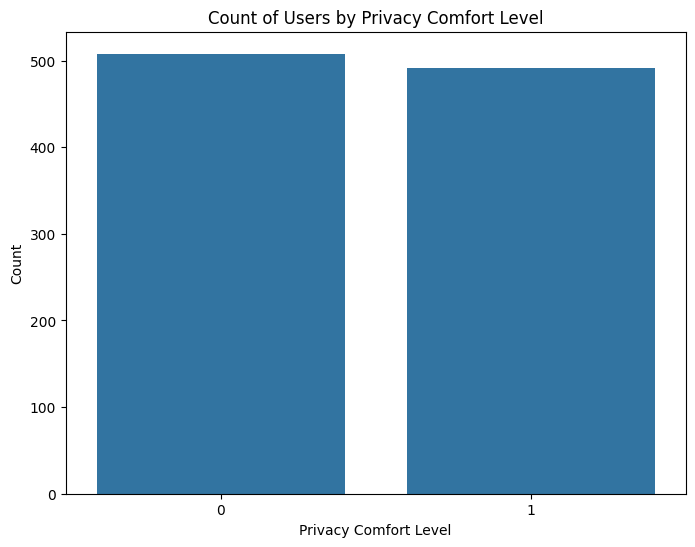

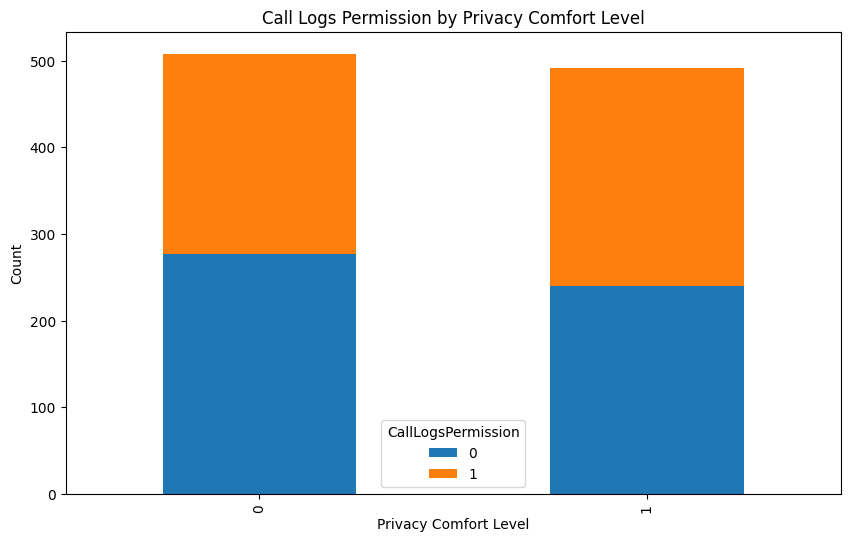

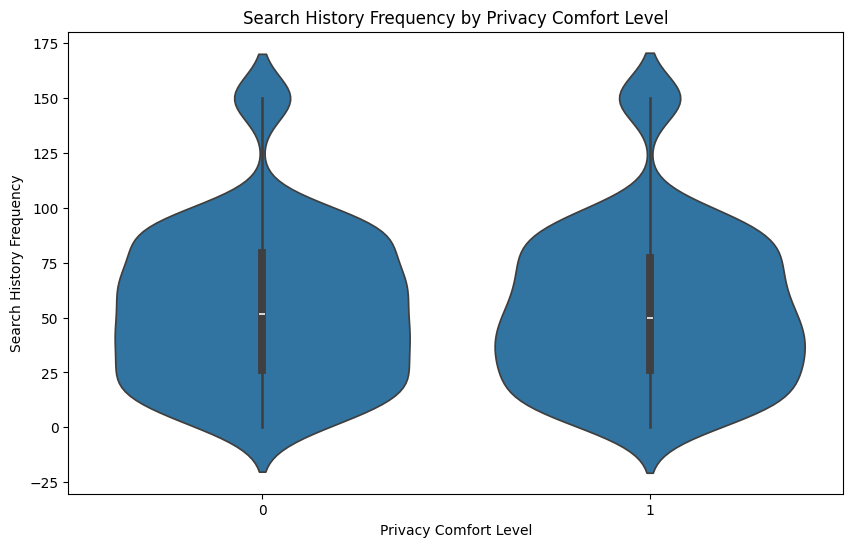

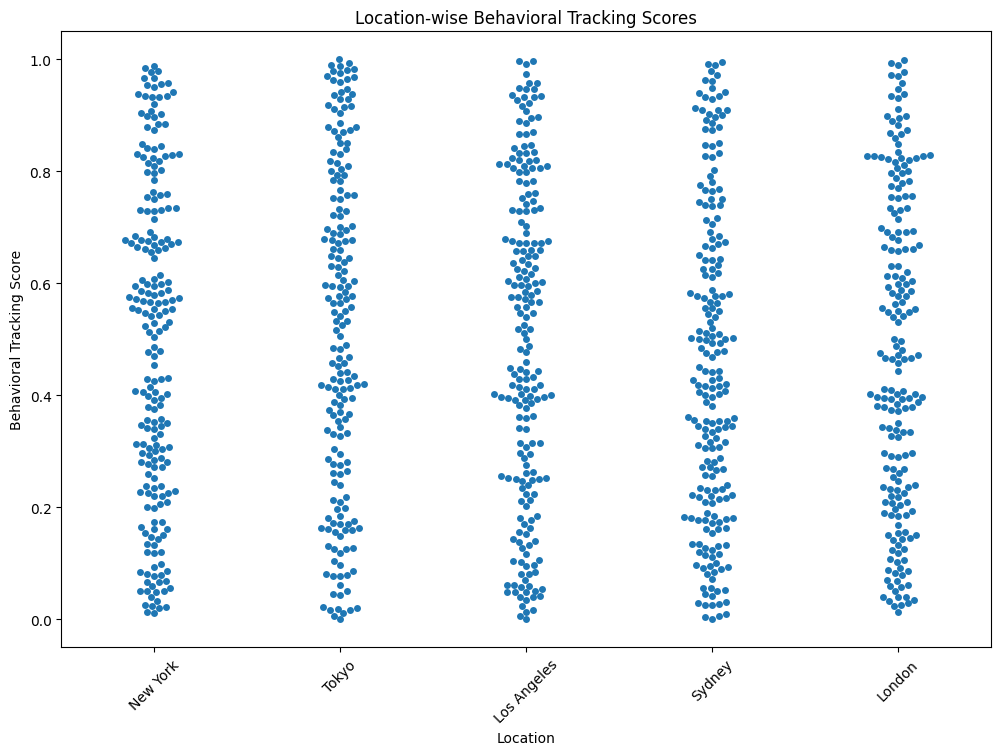

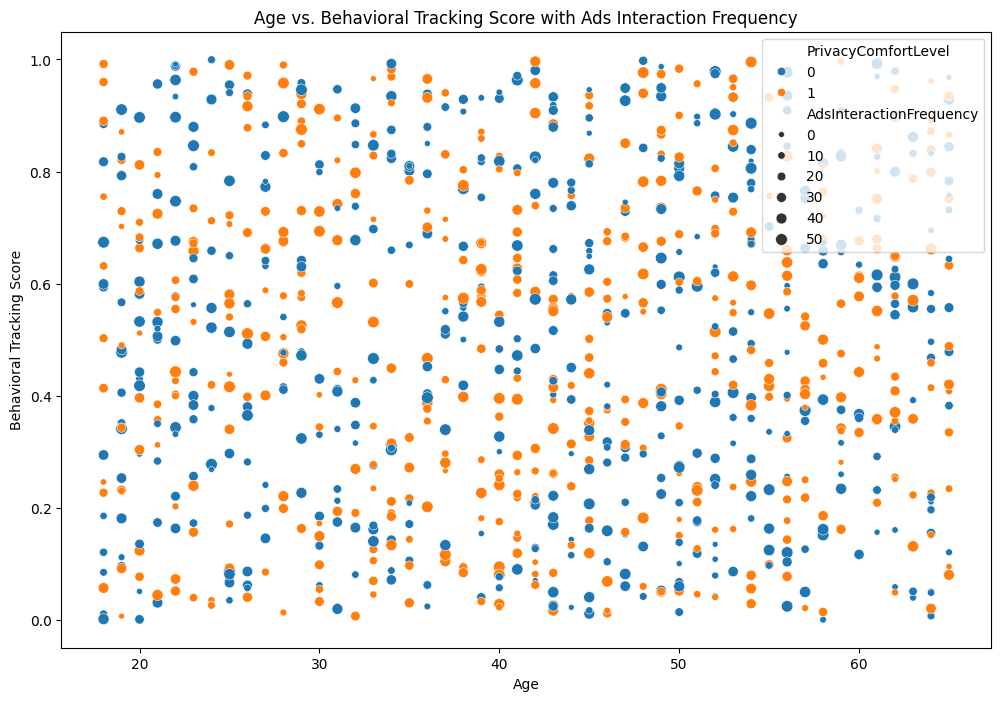

In [11]:
#Visualization 1: Correlation Matrix Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
#Visualization 2: Age Distribution by Privacy Comfort Level
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=df, hue='PrivacyComfortLevel', kde=True)
plt.title('Age Distribution by Privacy Comfort Level')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#Visualization 3: Distribution of Behavioral Tracking Scores
plt.figure(figsize=(10, 6))
sns.kdeplot(x='BehavioralTrackingScore', data=df, fill=True)
plt.title('Distribution of Behavioral Tracking Scores')
plt.xlabel('Behavioral Tracking Score')
plt.ylabel('Density')
plt.show()
#Visualization 4: Location-wise Distribution of Call Logs Permissions
plt.figure(figsize=(12, 8))
sns.countplot(x='Location', hue='CallLogsPermission', data=df)
plt.title('Location-wise Distribution of Call Logs Permissions')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#Visualization 5: Pie Chart of Device Type Distribution
device_type_counts = df['DeviceType'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(device_type_counts, labels=device_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Device Type Distribution')
plt.show()
#Visualization 6: Boxplot of Ads Interaction Frequency by Age Group
# Creating a new feature: AgeGroup
bins = [18, 25, 35, 50, 65]
labels = ['18-25', '26-35', '36-50', '51-65']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeGroup', y='AdsInteractionFrequency', data=df)
plt.title('Ads Interaction Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Ads Interaction Frequency')
plt.show()

#Visualization 7: Pair Plot of Numeric Features
sns.pairplot(df[['Age', 'SearchHistoryFrequency', 'BehavioralTrackingScore', 'AdsInteractionFrequency']])
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()
#Visualization 8: Count of Users by Privacy Comfort Level
plt.figure(figsize=(8, 6))
sns.countplot(x='PrivacyComfortLevel', data=df)
plt.title('Count of Users by Privacy Comfort Level')
plt.xlabel('Privacy Comfort Level')
plt.ylabel('Count')
plt.show()
#Visualization 9: Stacked Bar Chart of Call Logs Permission by Privacy Comfort Level
call_logs_permission_by_privacy = df.groupby(['PrivacyComfortLevel', 'CallLogsPermission']).size().unstack()
call_logs_permission_by_privacy.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Call Logs Permission by Privacy Comfort Level')
plt.xlabel('Privacy Comfort Level')
plt.ylabel('Count')
plt.show()
#Visualization 10: Violin Plot of Search History Frequency by Privacy Comfort Level
plt.figure(figsize=(10, 6))
sns.violinplot(x='PrivacyComfortLevel', y='SearchHistoryFrequency', data=df)
plt.title('Search History Frequency by Privacy Comfort Level')
plt.xlabel('Privacy Comfort Level')
plt.ylabel('Search History Frequency')
plt.show()
#Visualization 11: Swarm Plot of Location-wise Behavioral Tracking Scores
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Location', y='BehavioralTrackingScore', data=df)
plt.title('Location-wise Behavioral Tracking Scores')
plt.xlabel('Location')
plt.ylabel('Behavioral Tracking Score')
plt.xticks(rotation=45)
plt.show()
#Visualization 12: Bubble Chart of Age vs. Behavioral Tracking Score
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='BehavioralTrackingScore', size='AdsInteractionFrequency', data=df, hue='PrivacyComfortLevel')
plt.title('Age vs. Behavioral Tracking Score with Ads Interaction Frequency')
plt.xlabel('Age')
plt.ylabel('Behavioral Tracking Score')
plt.show()



5. Data Transformation:


In [12]:
# Creating a new feature: AgeGroup
bins = [18, 25, 35, 50, 65]
labels = ['18-25', '26-35', '36-50', '51-65']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the transformed dataset
print(df.head())



   UserID  Age  Location DeviceType  SearchHistoryFrequency  \
0    1001   56  New York    Windows                      36   
1    1002   46     Tokyo    Android                      83   
2    1003   32  New York      macOS                      48   
3    1004   60     Tokyo        iOS                      20   
4    1005   25  New York        iOS                      73   

   CallLogsPermission  LocationTrackingPermission  BehavioralTrackingScore  \
0                   0                           1                 0.143001   
1                   1                           1                 0.374548   
2                   0                           1                 0.797732   
3                   1                           0                 0.367391   
4                   0                           1                 0.087017   

   AdsInteractionFrequency  PrivacyComfortLevel AgeGroup  
0                       24                    1    51-65  
1                       15        

In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [14]:
target_column = 'PrivacyComfortLevel'

In [15]:
X = df.drop(columns=[target_column])
y = df[target_column]


In [16]:

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)


In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

In [19]:
# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.585
Precision: 0.5886238532110092
Recall: 0.585
F1 Score: 0.5843252032520325
Confusion Matrix:
 [[61 35]
 [48 56]]


##Difference between previous dataset and new dataset ##

       Previous Dataset  New Dataset with Outliers  Cleaned Dataset
count       1000.000000                1000.000000      1000.000000
mean          49.366000                  54.364000        54.364000
std           28.447659                  35.407078        35.407078
min            0.000000                   0.000000         0.000000
25%           25.000000                  26.000000        26.000000
50%           48.000000                  50.000000        50.000000
75%           73.000000                  78.000000        78.000000
max          100.000000                 150.000000       150.000000


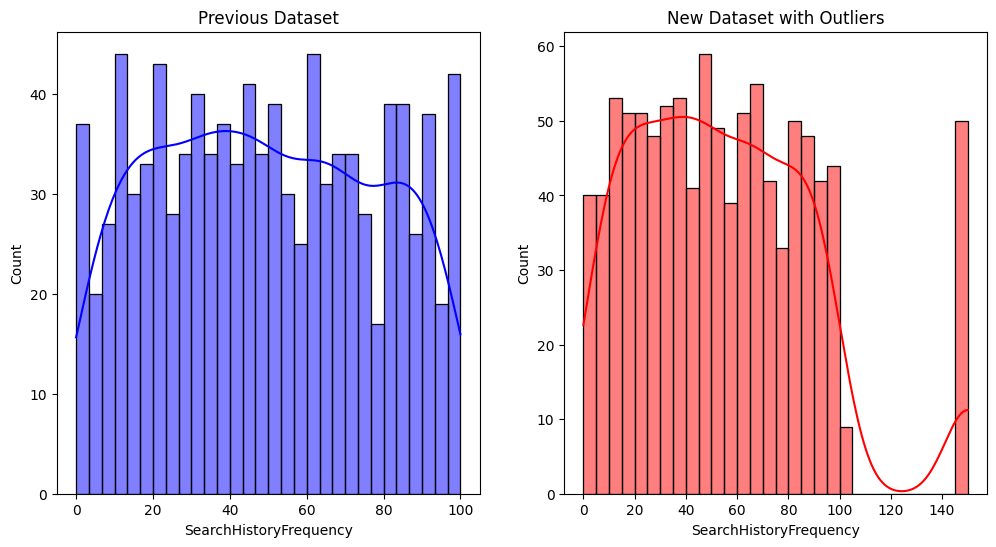

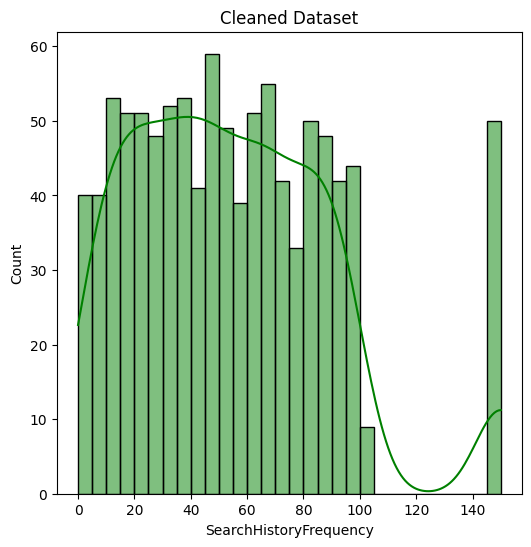

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the previous dataset
previous_dataset = pd.read_csv('SocialMediaTrackingDataset.csv')

# Load the new dataset with outliers
new_dataset_with_outliers = pd.read_csv('SocialMediaTrackingDataset_with_outliers.csv')

# Load the cleaned dataset
cleaned_dataset = pd.read_csv('SocialMediaTrackingDataset_cleaned.csv')

# Extract 'SearchHistoryFrequency' column for comparison
search_history_previous = previous_dataset['SearchHistoryFrequency']
search_history_with_outliers = new_dataset_with_outliers['SearchHistoryFrequency']
search_history_cleaned = cleaned_dataset['SearchHistoryFrequency']

# Compare statistical summary
summary_comparison = pd.DataFrame({
    'Previous Dataset': search_history_previous.describe(),
    'New Dataset with Outliers': search_history_with_outliers.describe(),
    'Cleaned Dataset': search_history_cleaned.describe()
})

print(summary_comparison)

# Visualize the distribution of 'SearchHistoryFrequency'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(search_history_previous, bins=30, kde=True, color='blue')
plt.title('Previous Dataset')

plt.subplot(1, 2, 2)
sns.histplot(search_history_with_outliers, bins=30, kde=True, color='red')
plt.title('New Dataset with Outliers')

plt.figure(figsize=(6, 6))
sns.histplot(search_history_cleaned, bins=30, kde=True, color='green')
plt.title('Cleaned Dataset')

plt.show()
